In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("car data.csv")

# Display first 5 rows
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print("Shape of Dataset:", df.shape)
print("\nData Types:\n")
print(df.dtypes)

print("\nSummary Statistics:\n")
print(df.describe())

Shape of Dataset: (301, 9)

Data Types:

Car_Name             str
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type            str
Selling_type         str
Transmission         str
Owner              int64
dtype: object

Summary Statistics:

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [5]:
data_dictionary = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Non-Null Count": df.count().values
})

data_dictionary

,Column Name,Data Type,Non-Null Count
0,Car_Name,str,301
1,Year,int64,301
2,Selling_Price,float64,301
3,Present_Price,float64,301
4,Driven_kms,int64,301
5,Fuel_Type,str,301
6,Selling_type,str,301
7,Transmission,str,301
8,Owner,int64,301


In [7]:
data_dictionary.to_csv("data_dictionary.csv", index=False)

In [8]:
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [9]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 2


In [10]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Car_Name:
<StringArray>
[                     'ritz',                       'sx4',
                      'ciaz',                   'wagon r',
                     'swift',             'vitara brezza',
                   's cross',                  'alto 800',
                    'ertiga',                     'dzire',
                  'alto k10',                     'ignis',
                       '800',                    'baleno',
                      'omni',                  'fortuner',
                    'innova',             'corolla altis',
               'etios cross',                   'etios g',
                'etios liva',                   'corolla',
                  'etios gd',                     'camry',
              'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave',                 'KTM RC200',
         'Bajaj Dominar 400', 'Royal Enfield Classic 350',
                 'KTM RC390',            'Hyosung GT250R',
 'Royal Enfiel

C:\Users\vch19\AppData\Local\Temp\ipykernel_1648\1785521662.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include='object').columns:


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# For numeric columns
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\vch19\AppData\Local\Temp\ipykernel_1648\576205073.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\vch19\AppData\Local\Temp\ipykernel_1648\576205073.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using

In [13]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()

C:\Users\vch19\AppData\Local\Temp\ipykernel_1648\1061859639.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include='object').columns:


In [14]:
import datetime

current_year = datetime.datetime.now().year

if 'Year' in df.columns:
    df['Car_Age'] = current_year - df['Year']

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,Wagon R,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


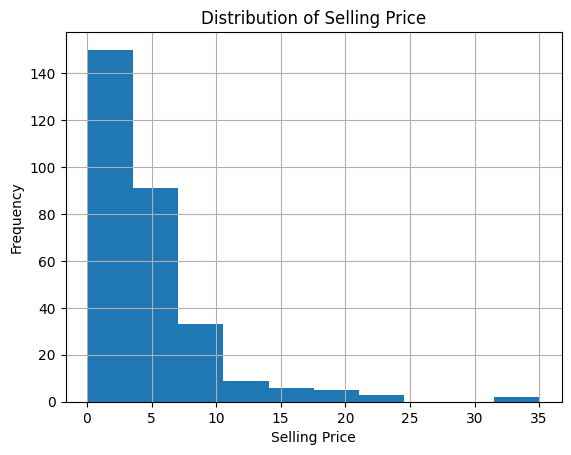

In [15]:
plt.figure()
df['Selling_Price'].hist()
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [16]:
df.to_csv("cleaned_car_data.csv", index=False)